<a href="https://colab.research.google.com/github/bibookss/machine-learning-notes/blob/main/computer-vision/FashionMNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convoltions
Convolutions are mathematical filters, similar to those applied in images that transforms a pixel value to another. The gaussian blur is one type of convolution that transforms a pixel value based on a grid of values specified by the Gaussian distribution.


Applying such filter highlights the vertical lines.
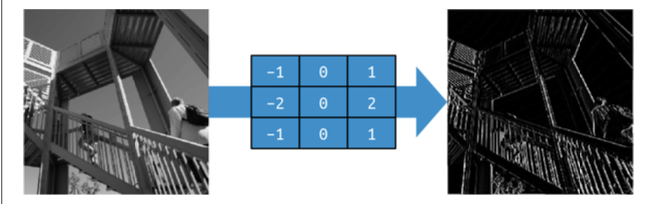

Applying such filter highlights the horizontal lines.
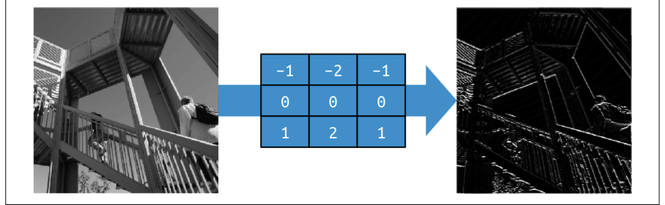

## Pooling
Pooling removes some part of an image while still making the image recognizable. The image is grouped into matrices which are called pools. Then a function is applied, such as max pooling which returns the maximum value in a pool. The pool then makes up the image, which has now been reduced in pixels.

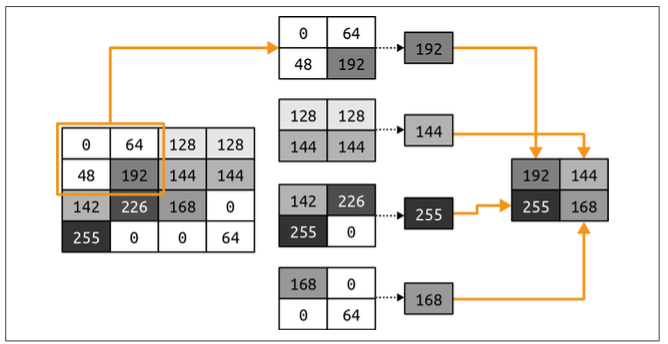

# Implementing CNNS from the FashionMNIST notebook

## 1. Previous code

In [ ]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4981 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3762 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3360 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3134 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2922 - accuracy: 0.8931


## 2. Introducing the convolutional layer

```
tf.keras.layers.Conv2D(64, (3, 3),activation='relu',
  input_shape=(28, 28, 1))
```

This convolutional layer specifies:
- 64 convlolutions to learn
  - The layer will learn the best convolution values overtime
- (3,3) is the size of the filter or matrix for the convolution
- activation is relu
- input shape is the same as before but with 1 since the image is grayscale (black to white = 0 to 255)

After the convolutional layer, pooling is done.

```
tf.keras.layers.MaxPooling2D(2, 2)
```

This layer specifies:
- max pooling which picks the max value in a pool
- the pool size is 2 x 2



## 3. Adding the convolutional layer


In [1]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Reshape the images to be the same as the convolutional layer.

In [2]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

Include the additional layers.

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3),activation='relu',
    input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [6]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 21s 5ms/step - loss: 0.4395 - accuracy: 0.8421
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2485 - accuracy: 0.9078
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2161 - accuracy: 0.9201
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1887 - accuracy: 0.9292
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1669 - accuracy: 0.9378
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1463 - accuracy: 0.9455
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1276 - accuracy: 0.9519
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1097 - accuracy: 0.9590
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.09

In [7]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[4.5564397e-28 8.9005560e-33 4.9660198e-31 0.0000000e+00 0.0000000e+00
 1.0221693e-22 0.0000000e+00 3.0689083e-24 9.7808237e-27 1.0000000e+00]
9


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

The output shape changed from an input of 28 x 28, to 26 x 26 in the first Conv Layer, to 13 x 13 in the Pooling Layer, to 11 x 11 in the second Conv Layer, to 5 x 5 in the second Pooling Layer.

### Size Reductions
#### On convolutions and borders
When applying convolutions, the borders in the image is removed. So the size becomes (w-2, h-2), where w and h is the width and heigh respectively.

#### On pooling layers
The pooling layer decreased the size of the image by half as specified in the pool size of (2, 2).

### Parameters
The conv layer has 64 filters and since the size of the filter is 3 x 3, it has 9 parameters plus a bias. The first layer has 64 (filters) x 10 parametes = 640 parameters.

The second conv layer also has 64 filters but has the previous filters applied to it (64 * 9) plus a bias of 64 from the previous layer (1 x 64).

The pooling layer only reduced the size of the image so the parameters is 0.

## Summary
Convolutions are filters that are applied to images. They have a set size and parameters in each cell (imagine a matrix). After applying a conv layer, a pooling layer always follows which aims to decrease the size of the image while also highlighting the feature of an image.
